# PDP

### Group 4:
Banzon, Beatrice Elaine<br>
Endozo, Angelo Gaillar<br>
Ong, Charles Mathew

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Preprocessing

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

## Convert all the strings to booleans from binaries or One Hot Encode

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### customerID is an identifier, not a feature, so drop it.

In [4]:
df = df.drop(columns='customerID')

#### Pandas get_dummies() performs OneHot

It splits the categories into individual columns. The original column is then deleted.

In [5]:
cols_OneHot = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cols_OneHot, dtype=np.uint8)

#### Pandas apply/replace does the rest.

In [6]:
def ConvertToBinary(df, cols, truth_val = 'Yes'):
    for col in cols:
        df[col] = df[col].apply(lambda x : 1 if x == truth_val else 0).astype(bool)

    return df

In [7]:
# CONNVERT ALL 'YES' AND 'NO'
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']
df = ConvertToBinary(df, cols)

# CONNVERT ALL BINARIES (Not necessary but keeps things consistent)
df = ConvertToBinary(df, ['SeniorCitizen'], 1)
df = ConvertToBinary(df, df.columns[df.columns.get_loc('Churn')+1:], 1)

# CONNVERT 'MALE' AND 'FEMALE'
df = ConvertToBinary(df, ['gender'], 'Male')
df = df.rename(columns={'gender': 'IsMale'})

# THERE WERE NO NULLS USING ISNA/ISNULL, BUT THERE ARE BLANK STRINGS ' '.
# REPLACE BLANKS WITH 0
df['TotalCharges'] = df['TotalCharges'].replace({' ' : 0})
df['TotalCharges'] = df['TotalCharges'].astype(float)
df

IsMale  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      False          False     True       False       1         False   
1       True          False    False       False      34          True   
2       True          False    False       False       2          True   
3       True          False    False       False      45         False   
4      False          False    False       False       2          True   
...      ...            ...      ...         ...     ...           ...   
7038    True          False     True        True      24          True   
7039   False          False     True        True      72          True   
7040   False          False     True        True      11         False   
7041    True           True     True       False       4          True   
7042    True          False    False       False      66          True   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0             False           False          True             False  ...   
1             False            True         False              True  ...   
2             False            True          True             False  ...   
3             False            True         False              True  ...   
4             False           False         False             False  ...   
...             ...             ...           ...               ...  ...   
7038           True            True         False              True  ...   
7039           True           False          True              True  ...   
7040          False            True         False             False  ...   
7041           True           False         False             False  ...   
7042          False            True         False              True  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    True                        False               False   
1                    True                        False               False   
2                    True                        False               False   
3                    True                        False               False   
4                   False                         True               False   
...                   ...                          ...                 ...   
7038                 True                        False               False   
7039                False                         True               False   
7040                 True                        False               False   
7041                False                         True               False   
7042                False                         True               False   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        True              False              False   
1                       False               True              False   
2                        True              False              False   
3                       False               True              False   
4                        True              False              False   
...                       ...                ...                ...   
7038                    False               True              False   
7039                    False               True              False   
7040                     True              False              False   
7041                     True              False              False   
7042                    False              False               True   

      PaymentMethod_Bank transfer (automatic)  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   
...                                       ...   
7038                                    False   
7039                  

#### No more strings left

In [8]:
df.dtypes

IsMale                                        bool
SeniorCitizen                                 bool
Partner                                       bool
Dependents                                    bool
tenure                                       int64
PhoneService                                  bool
MultipleLines                                 bool
OnlineSecurity                                bool
OnlineBackup                                  bool
DeviceProtection                              bool
TechSupport                                   bool
StreamingTV                                   bool
StreamingMovies                               bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

## Feature Scaling
Since most of are data are booleans, only `tenure`, `MonthlyCharges`, `TotalCharges` are floats possessing outlieres and such.

#### However, decision trees are `invariant` to these scales hence it's fine to proceed without feature scaling.

In [9]:
df.describe().transpose().query("std > 1")

count         mean          std    min     25%      50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

# EDA

### Imbalanced Data
There are fewer churn records.

In [10]:
df['Churn'].value_counts()

Churn
False    5174
True     1869
Name: count, dtype: int64

## Correlation Check
To check if it's feasible to perform PDP, we have to consider the feature correlations.

#### It's seen that the Charges have the most correlations. 
This is due to amount increasing/decreasing depending on the services a customer subscribed to; with `InternetService` being the biggest contributing factor to the charges.

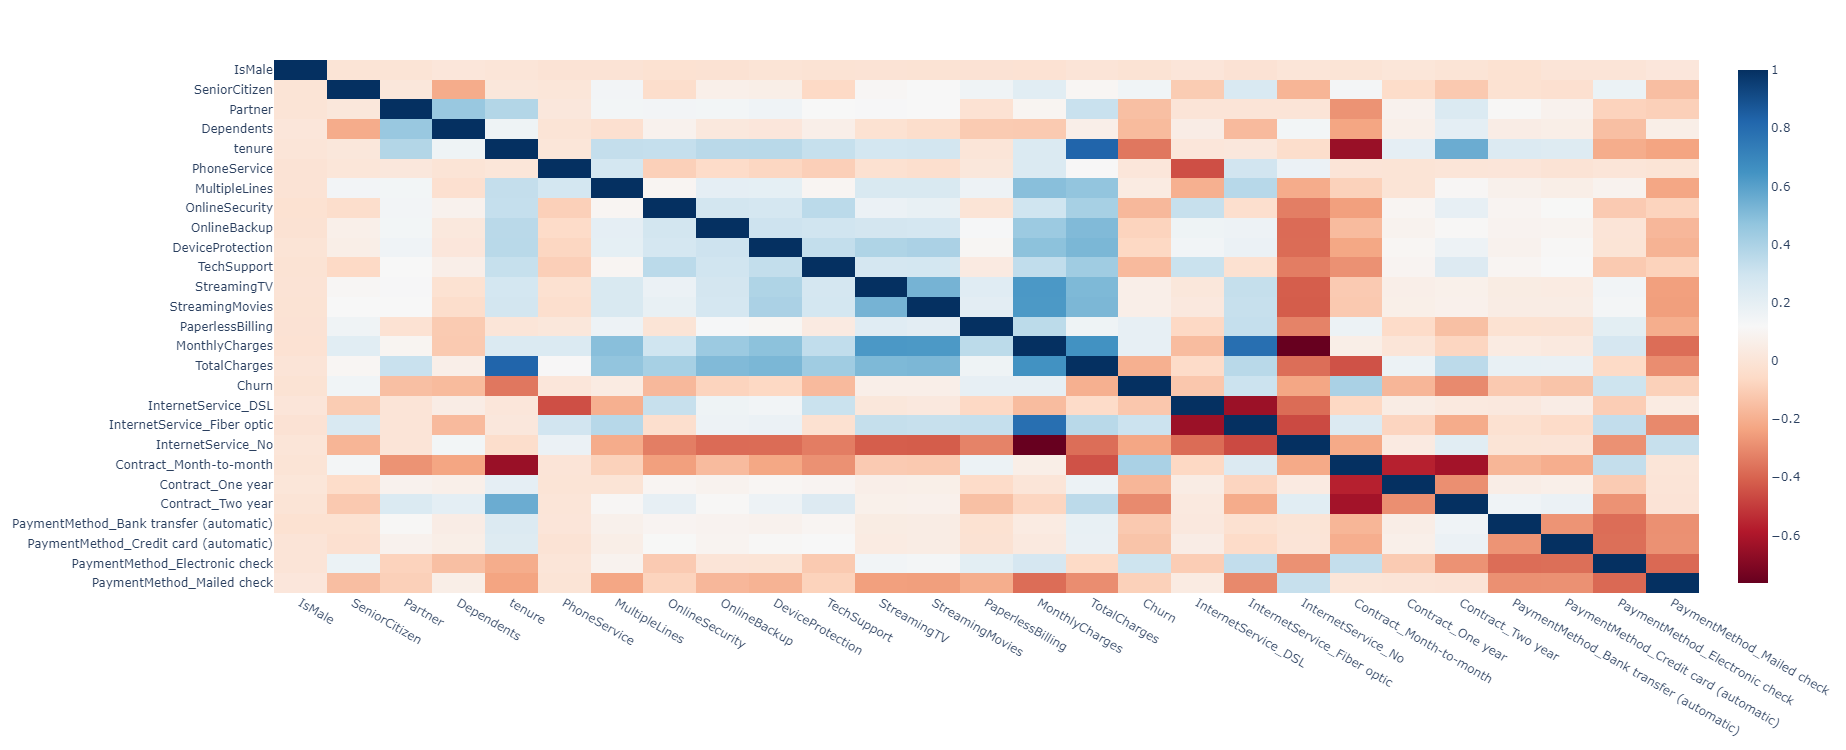

In [11]:
corr = df.corr()
px.imshow(corr, height=750, aspect='auto', color_continuous_scale=px.colors.diverging.RdBu)

# Splitting the data
Predicting for `Churn`<br>
30% test size

In [12]:
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 26)
(2113, 26)
(4930,)
(2113,)


# Creating the Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score;

In [14]:
# JUST GO WITH DEFAULT HYPERPARAMTERS. 

model_vanilla = RandomForestClassifier(random_state=42)
model_vanilla.fit(X_train, y_train)

print(f'F1\t\t: {f1_score(y_test, model_vanilla.predict(X_test))}')
print(f'Accuracy\t: {accuracy_score(y_test, model_vanilla.predict(X_test))}')

F1		: 0.548
Accuracy	: 0.7860861334595362


# PDP

### What is PDP?
PDP (Partial dependence plots) is a Post-Hoc analysis that provides a visualization of a feature's contribution to the prediction. 

This is done by continually tweaking the independent feature and observing the predictions it generates. The more extreme these predictions are, the more inclined we are to believe in a strong correlation/contribution by said feature.

### How does PDP differ from other analysis?
PDP's main differences are...
<ol>
    <li>Feature independence - Whenever a feature is tweaked, it's preferred that other features are not affected. It's similar to experimentation. We prefer to study cause and effect in isolation.</li>
    <li>Global explanation - PDP works with all data points but only alters a specific feature. This allows it to generalize the entire dataset.</li>
    <li>Marginal - PDP can only alter and observe few features at a time when generating a graph.</li>  
</ol>

In [15]:
def pdp_Predict(col, model):
    y_pred = []

    max = int(X[col].max() + 1)
    
    for i in range(int(X[col].min()), max, max//100 if max > 100 else 1):
        X_copy = X.copy()
        X_copy[col] = i
    
        y_pred.append([i, model.predict(X_copy).mean()])
        
    y_pred = pd.DataFrame(y_pred, columns=[col, 'Prediction'])
    y_pred = y_pred.set_index(col)
    return y_pred

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


def pdp_Graph(model):
    cols = X.columns
    fig = make_subplots(rows=len(cols)//3 + 1, 
                        cols=3, 
                        subplot_titles=cols,
                        y_title = 'Prediction',
                        shared_yaxes='all'
                       )
    
    
    ncol = 1
    nrow = 1
    for col in cols:
        y_pred = pdp_Predict(col, model)
        
        fig.add_trace(go.Scatter(x=y_pred.index, y=y_pred['Prediction'], name=col), row=nrow, col=ncol)
    
        ncol += 1
        if ncol > 3:
            nrow += 1;
            ncol = 1
    
    fig.update_layout(height=400*nrow-2,
                      title_text="PDP Feature Plots")
    
    fig.show()

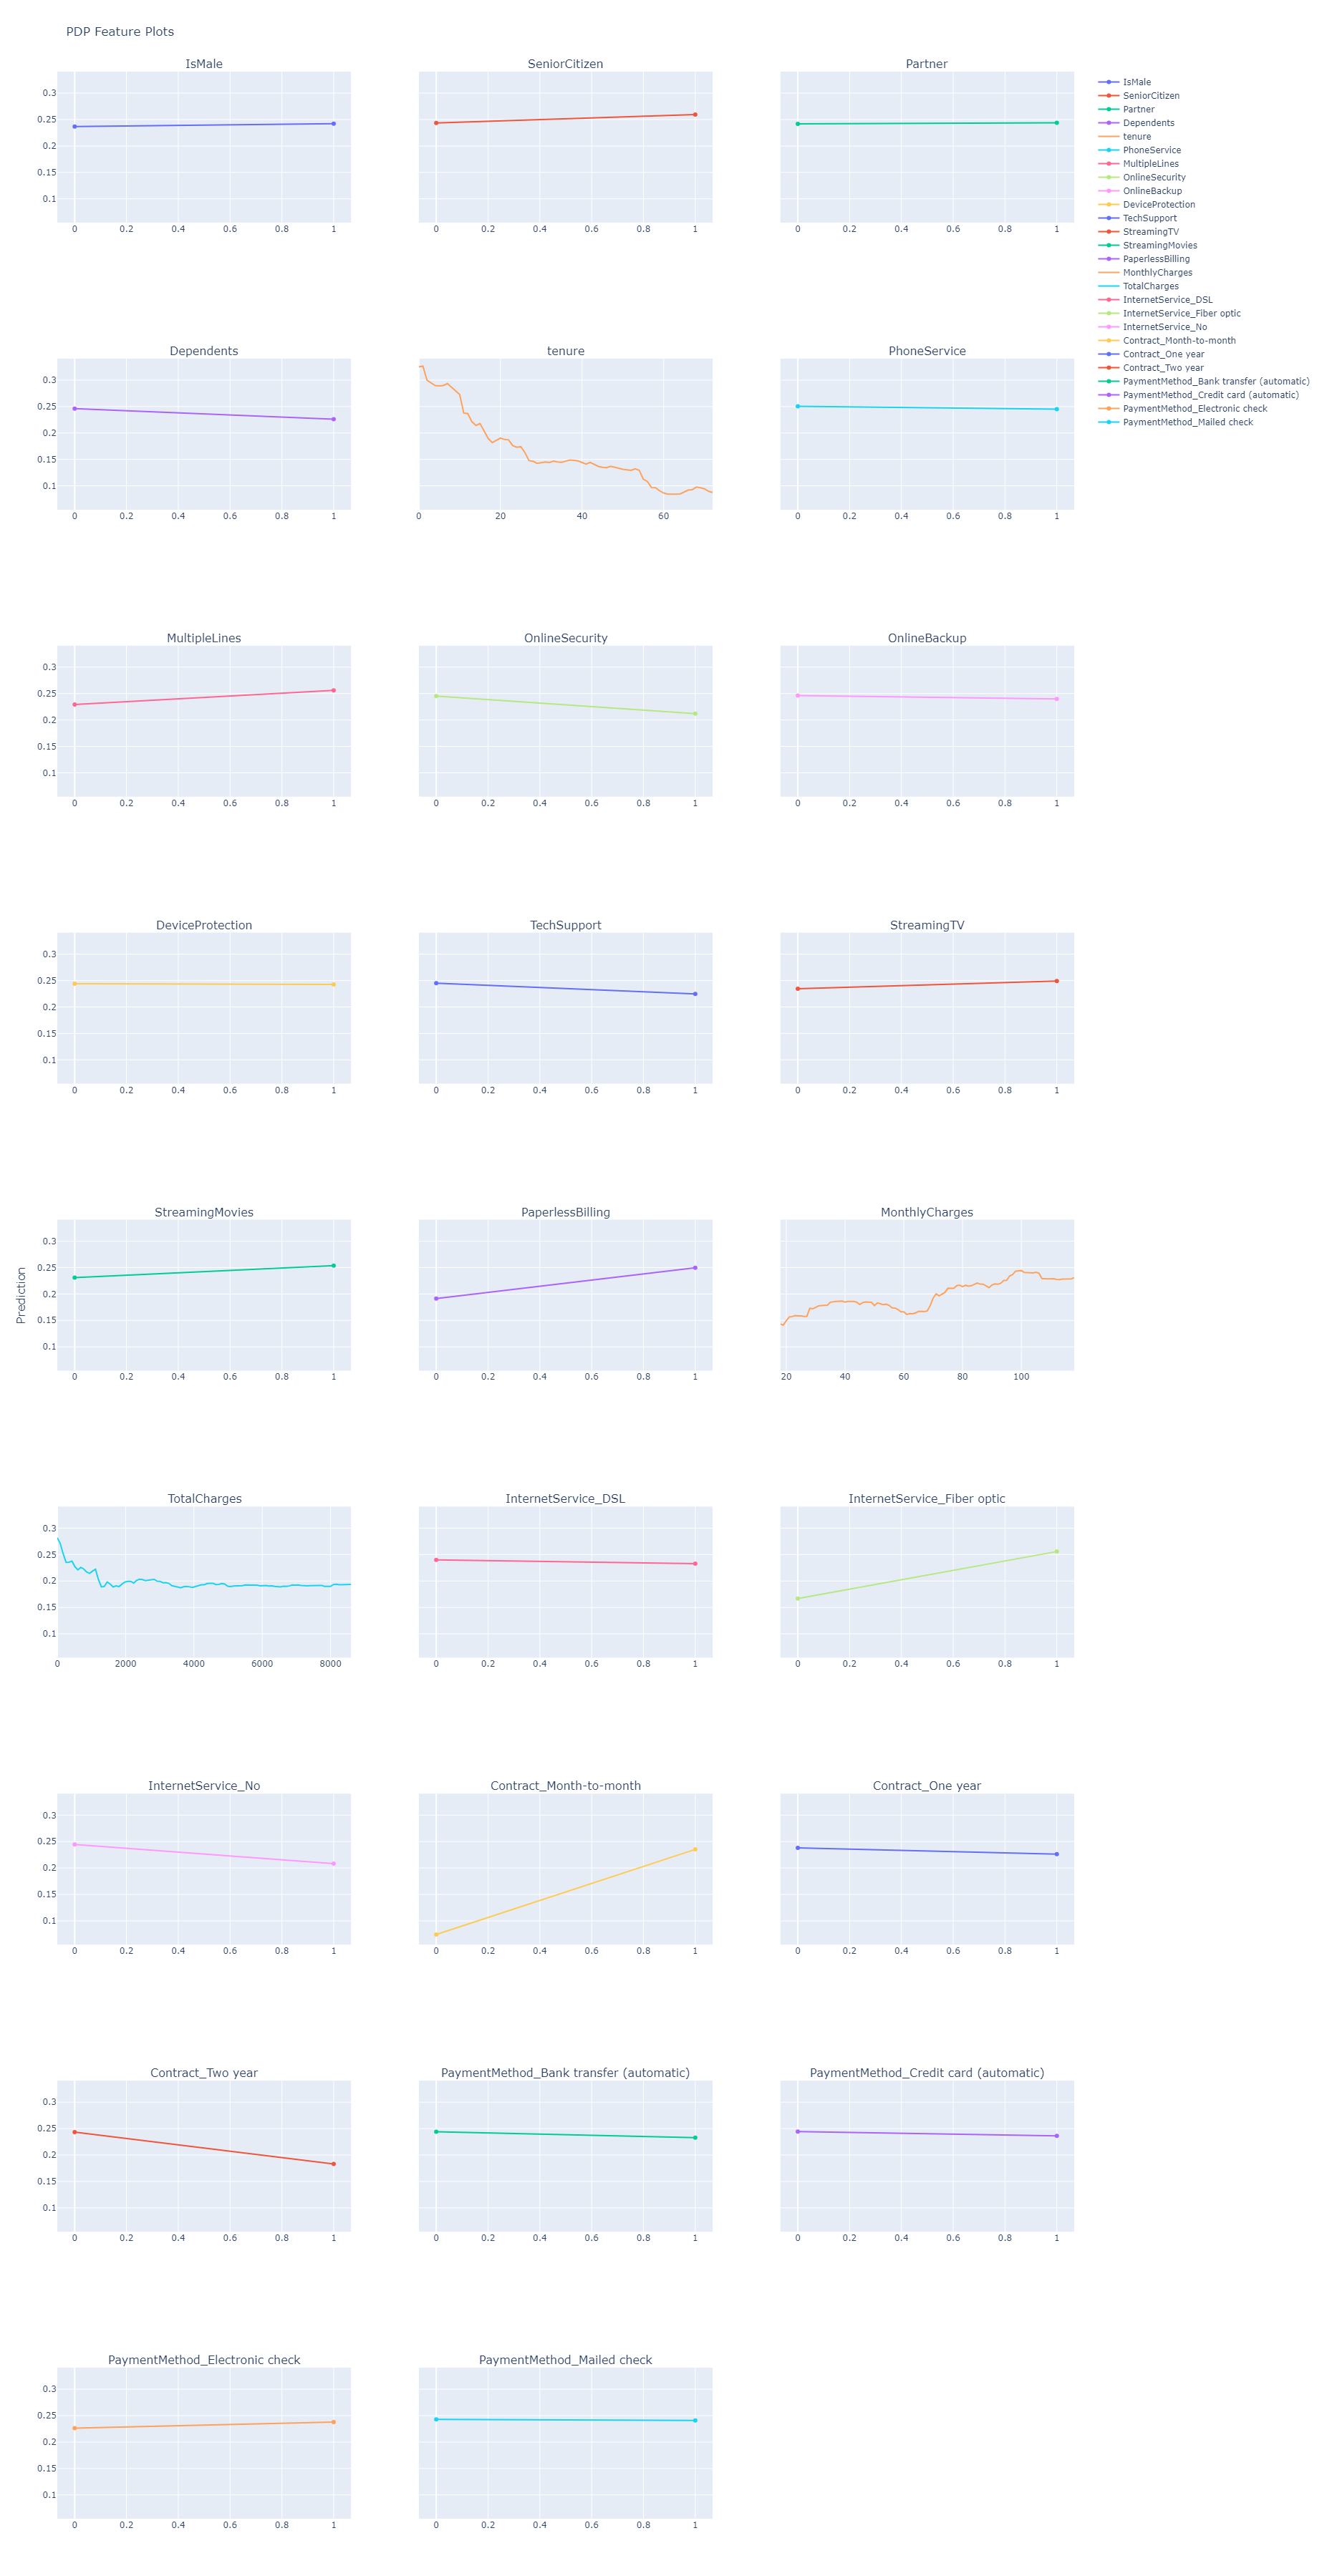

In [17]:
pdp_Graph(model_vanilla)

# Observations

#### No difference:
<ul>
    <li>gender (IsMale)</li>
    <li>Partner</li>
    <li>PhoneService</li>
    <li>OnlineBackup</li>
    <li>DeviceProtection</li>
    <li>Contract_One_Year</li>
    <li>PaymentMethod</li>
</ul>

#### Noticeable difference (> 1%):
<ul>
    <li>SeniorCitizen - 2% higher churn rate for Seniors.</li>
    <li>Dependents - 2% lower churn rate for those with Dependents.</li>
    <li>MultipleLines - 2% Higher for Multiline subscribers</li>
    <li>TechSupport - 2% lower for subscribers.</li>
    <li>StreamingTV - 1.5% for subscribers.</li>
    <li>StreamingMovies - 2% Higher for subscribers</li>
    <li>PaperlessBilling - 5% Higher for subscribers</li>
    <li>Contract_Month to Month - 17% Higher for subscribers</li>
    <li>Contract_TwoYear - 6% Lower for subscribers</li>
    <li>OnlineSecurity - 5% Higher for subscribers</li>
    <li>InternetService_Fiber - 10% Higher for subscribers</li>
    <li>tenure - 22% difference between lowest and highest rates. Churn rate decreases as customers have longer availed of services.</li>
    <li>MonthlyCharges - 10% difference between lowest and highest rates. Churn rates seem to stagnate at the brackets of: 20-27, 60-68, 82-95, 108-118</li>
    <li>TotalCharges - 10% difference between lowest and highest rates. Churn rate significantly drops at around \$100 and \$1100 marks.</li>
</ul>

## Most Important Features

<ol>
    <li>`tenure` was seen to reduce churn rate by up to 22% as familiarity with the service grows.</li>
    <li>Contract duration greatly affects churn rate. `2 year contracts` reduce churn rate by 6% as customers must wait for the completion of the contract before terminating.</li>
    <li>Internet_Fiber was the service with the highest churn rate of 10% for subscribers.</li>
    <li>`MonthlyCharges` can also affect churn rate by up to 10% difference based on pricing.</li>
</ol>


#### Others...
Other services generlly see 2% or 5% higher churn rate for subscribers. Conversely, tech support can reduce this by 2%.

# PDP vs Forest Feature Weight
#### Does the PDP match the weights?

The PDP showed the results we were expecting. `tenure` was a volatile feature hence we selected it.

`InternetServicer_Fiber Optic` is also one of the more volatile graphs for services.

Those features that were indifferent (`PhoneService`), do indeed have minimal weights as well as seen below.

Comparing feature weight vs PDP graphs, a key element missing is direction. Contract duration indeed does affect churn rate yet consulting its feature weights alone aren't able to inform us as to how its affected (increase/decrease).

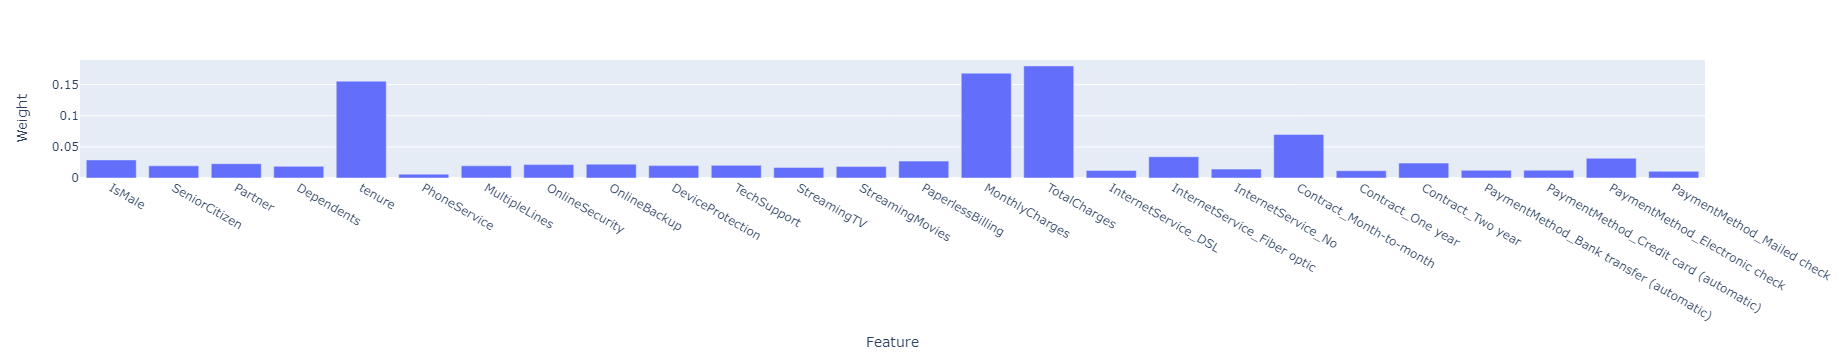

In [18]:
df_forestWeights = pd.DataFrame({'Feature': model_vanilla.feature_names_in_, 'Weight': model_vanilla.feature_importances_})
px.bar(df_forestWeights, x='Feature', y='Weight')

## Issue with `TotalCharges`

TotalCharges is redundant. It's a dependent feature built from both `MonthlyCharges` and `tenure`. It would be best to remove this as it's open to __misinterpretation__ such as...

> "Increasing prices will reduce churn since it increases `TotalCharges`."

MonthlyCharges is also a feature dependent on the services a customer has subscribed to. However this may still be interpretable in finding reasonable pricing ranges, hence considerations might be made.

## Let's try removing the dependent features of `MonthlyCharges` and `TotalCharges`

In [19]:
X = df.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model_independent = RandomForestClassifier(random_state=42)
model_independent.fit(X_train, y_train)

print(f'F1\t\t: {f1_score(y_test, model_independent.predict(X_test))}')
print(f'Accuracy\t: {accuracy_score(y_test, model_independent.predict(X_test))}')

F1		: 0.5225225225225225
Accuracy	: 0.7742546142924751


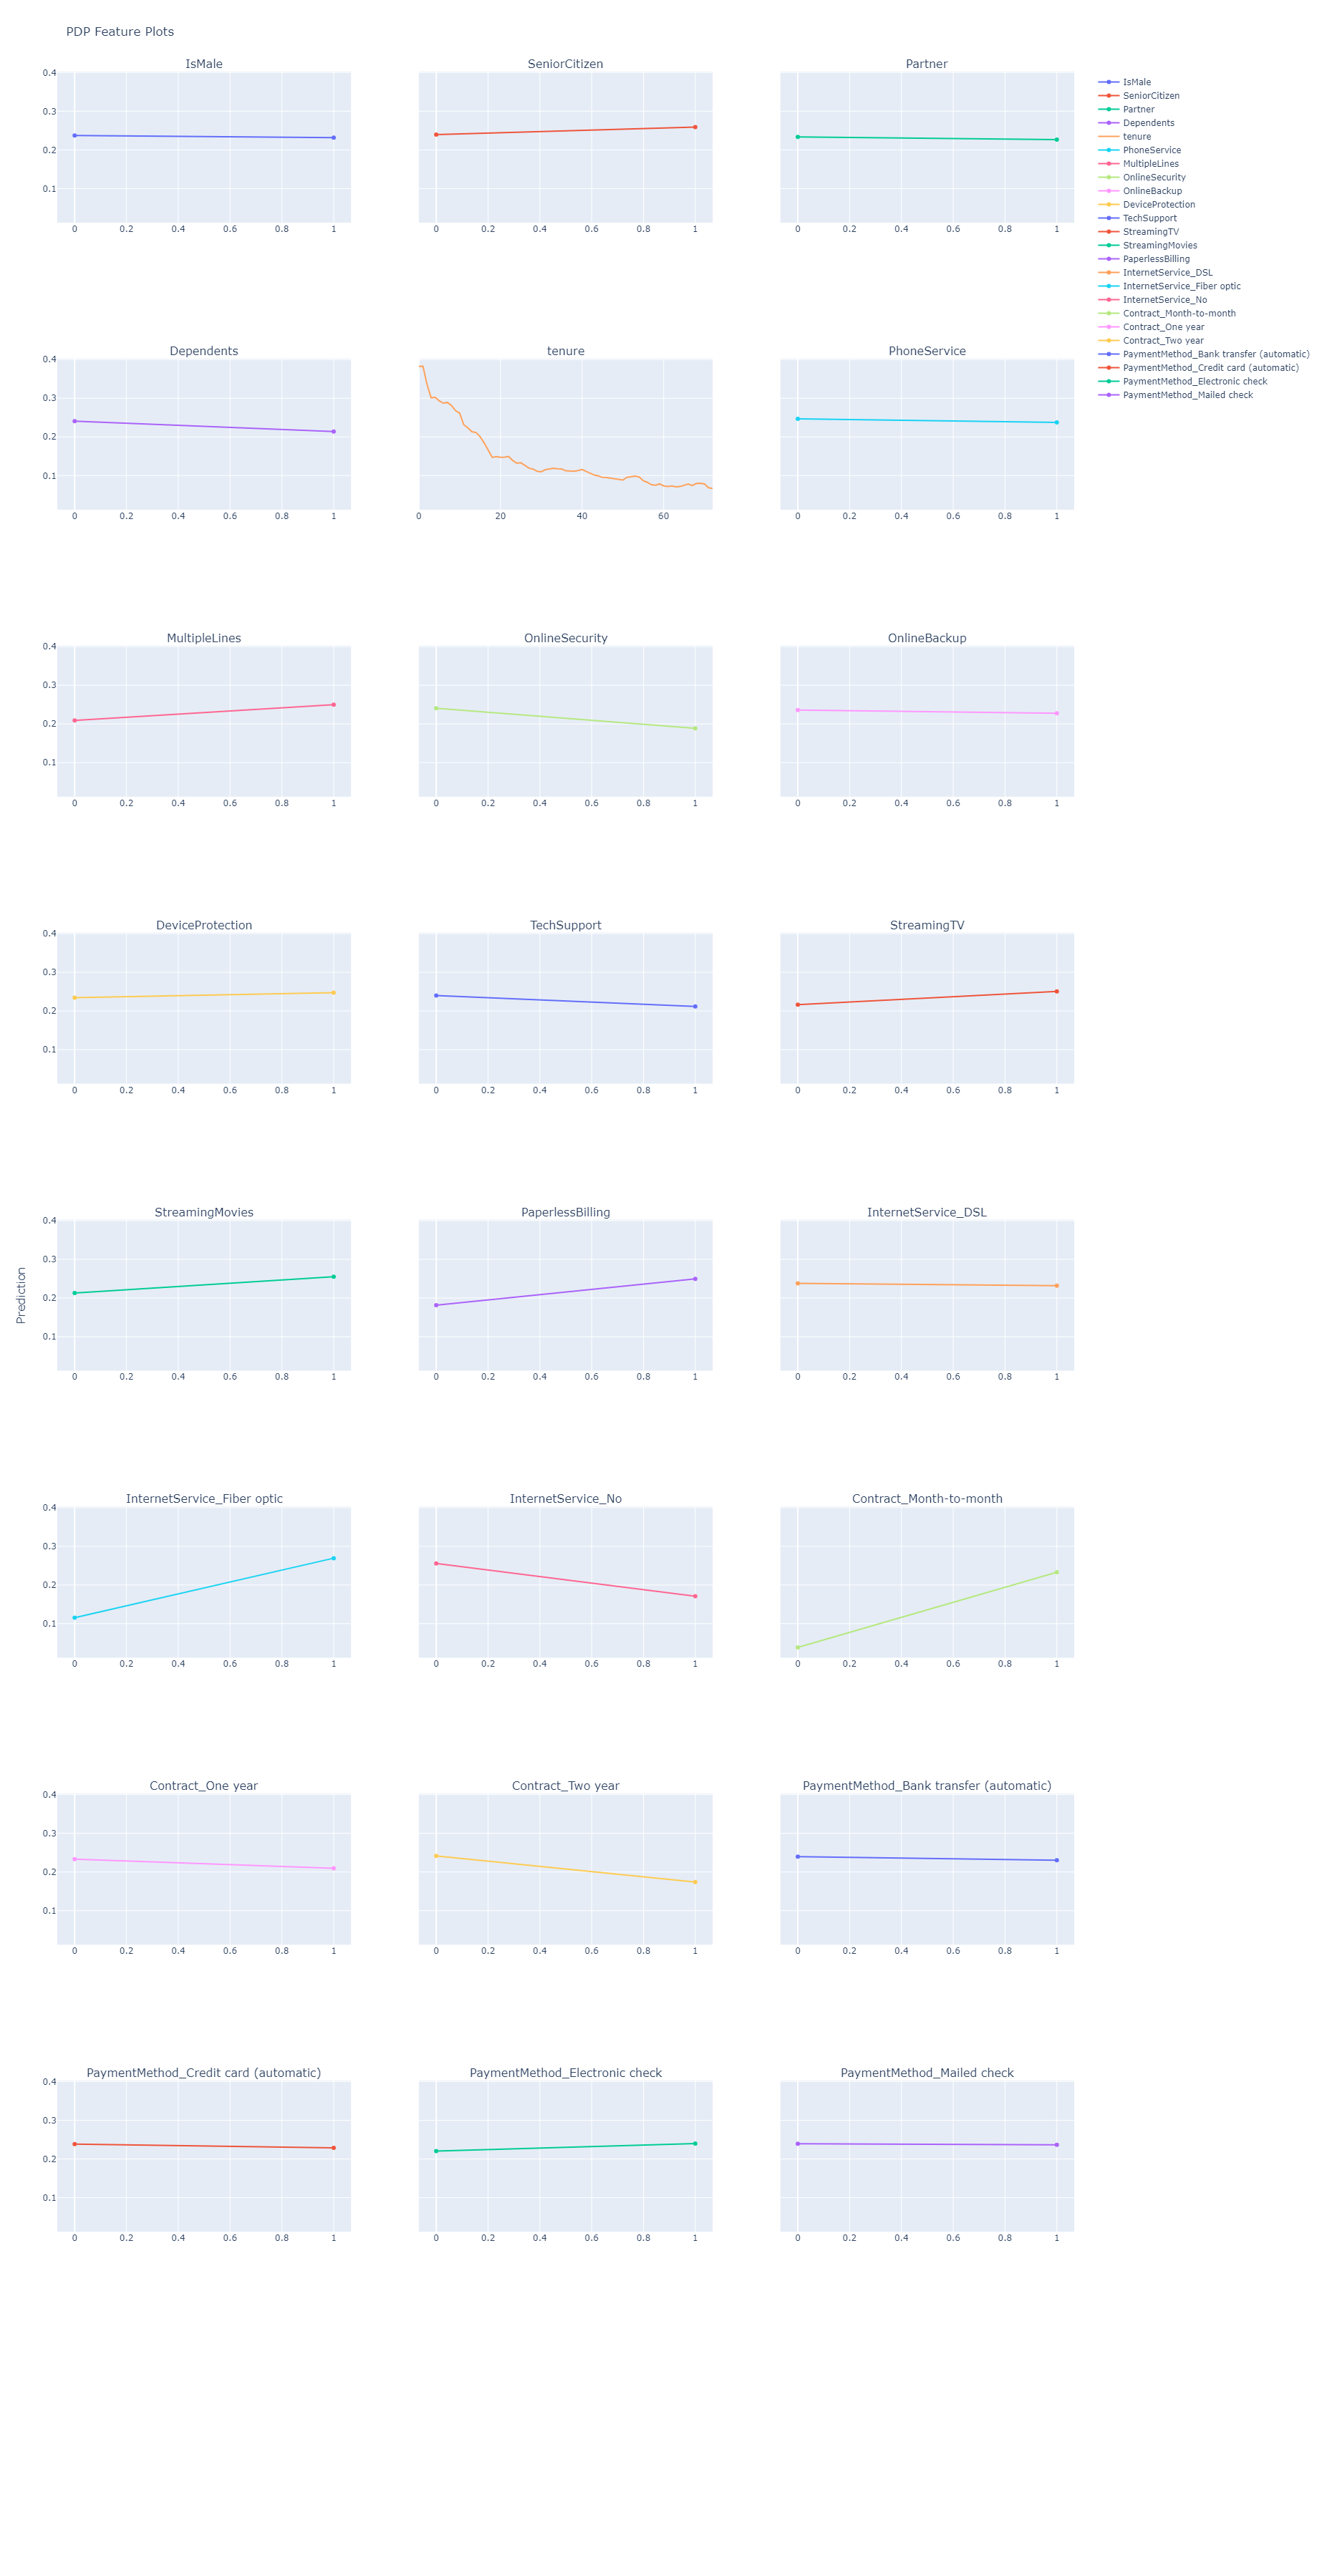

In [20]:
pdp_Graph(model_independent)

### Did the results change from dropping dependent features?

#### Scores
The scores decreassed by a small amount for both accuracy and F1.

#### Graphs
The graphs still maintain their previous trend, just with somewhat different values.<br>
`tenure` jumped from the previous 22% difference to 32% difference.

Overall, dropping the dependent features didn't distort any trends and can amplify the differences.<br>
However dropping MonthlyCharges has also lost insight on ideal pricing range tolerance of customers.

# What about for an Ensemble 
#### Will we see the same results?

In [21]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [22]:
param_grid = {
    "n_estimators": range(100, 150, 10),
    "max_depth": range(5,50,5),
    "min_samples_split": np.arange(.1,.6,.1),
    "min_samples_leaf": np.arange(.1,.6,.1),
    "max_features": np.arange(0.1, 0.6, .1)
}

clf_grid = RandomizedSearchCV(model, param_grid, n_iter=25)
clf_grid.fit(X_train, y_train)

print(f'F1\t\t : {f1_score(y_test, clf_grid.best_estimator_.predict(X_test))}')
print(f'Accuracy\t : {accuracy_score(y_test, clf_grid.best_estimator_.predict(X_test))}')
clf_grid.best_estimator_

F1		 : 0.3347050754458162
Accuracy	 : 0.7704685281590156


RandomForestClassifier(max_depth=15, max_features=0.4, min_samples_leaf=0.1,
                       min_samples_split=0.2, n_estimators=120)

## Observations

### Score
Ensembles help reduce overfitting through consulting multiple models. Hence it's reasonable that F1 and Accuracy scores are lower than that for the single RandomForest model (.548 and .786 scores, respectively).

### Weights
#### Differences
Compared to a single random forest, the ensemble performed a more thorough feature selection. There are a lot of features discarded (weights near 0).

Due to the weights changing, the PDP graphs are also affected. The most noticeable of which is `tenure`. At around 10 years onwards, the ensemble believes that churn will immediately plummit to a complete 0 churn rate.<br>
This is of course an extreme overgeneralization as customers can still churn yet the ensemble may have failed to select those cases to study.

#### New Insight
A new insight is also on billing in general. Customers using `PaperlessBilling` and `Payment_Electronic check` were more likely to churn.

#### Same
For other binary weights, we still generally see the same trend but with smaller prediction differences.

Contract duration is still an important factor, with longer durations mitigating churn.

Fiber optic internet subscribers are still more likely to churn.

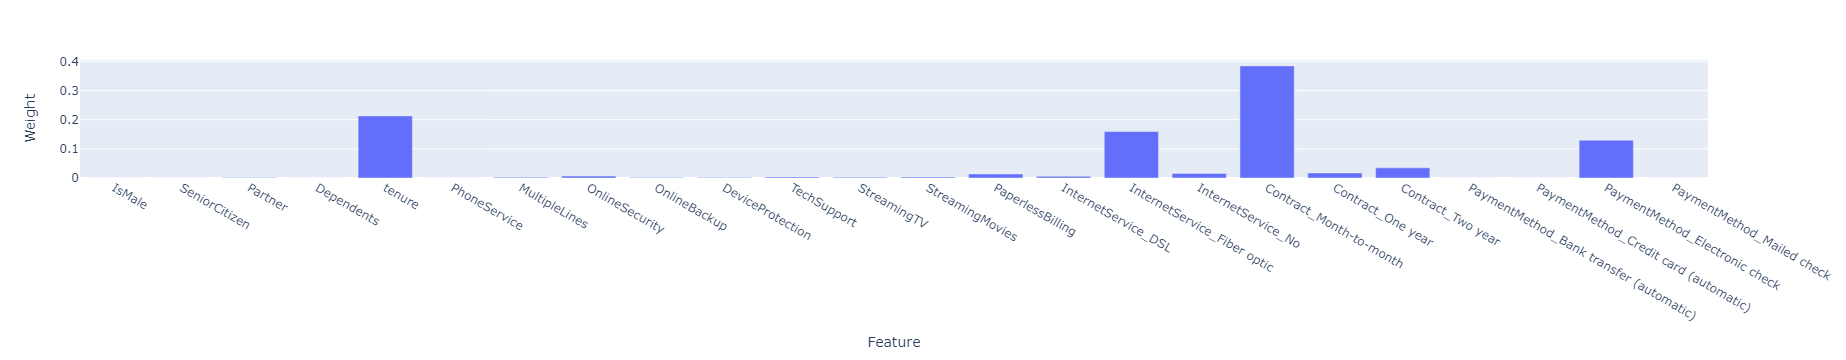

In [23]:
df_forestWeights = pd.DataFrame({'Feature' : clf_grid.best_estimator_.feature_names_in_, 'Weight' : clf_grid.best_estimator_.feature_importances_})
px.bar(df_forestWeights, x='Feature', y='Weight')

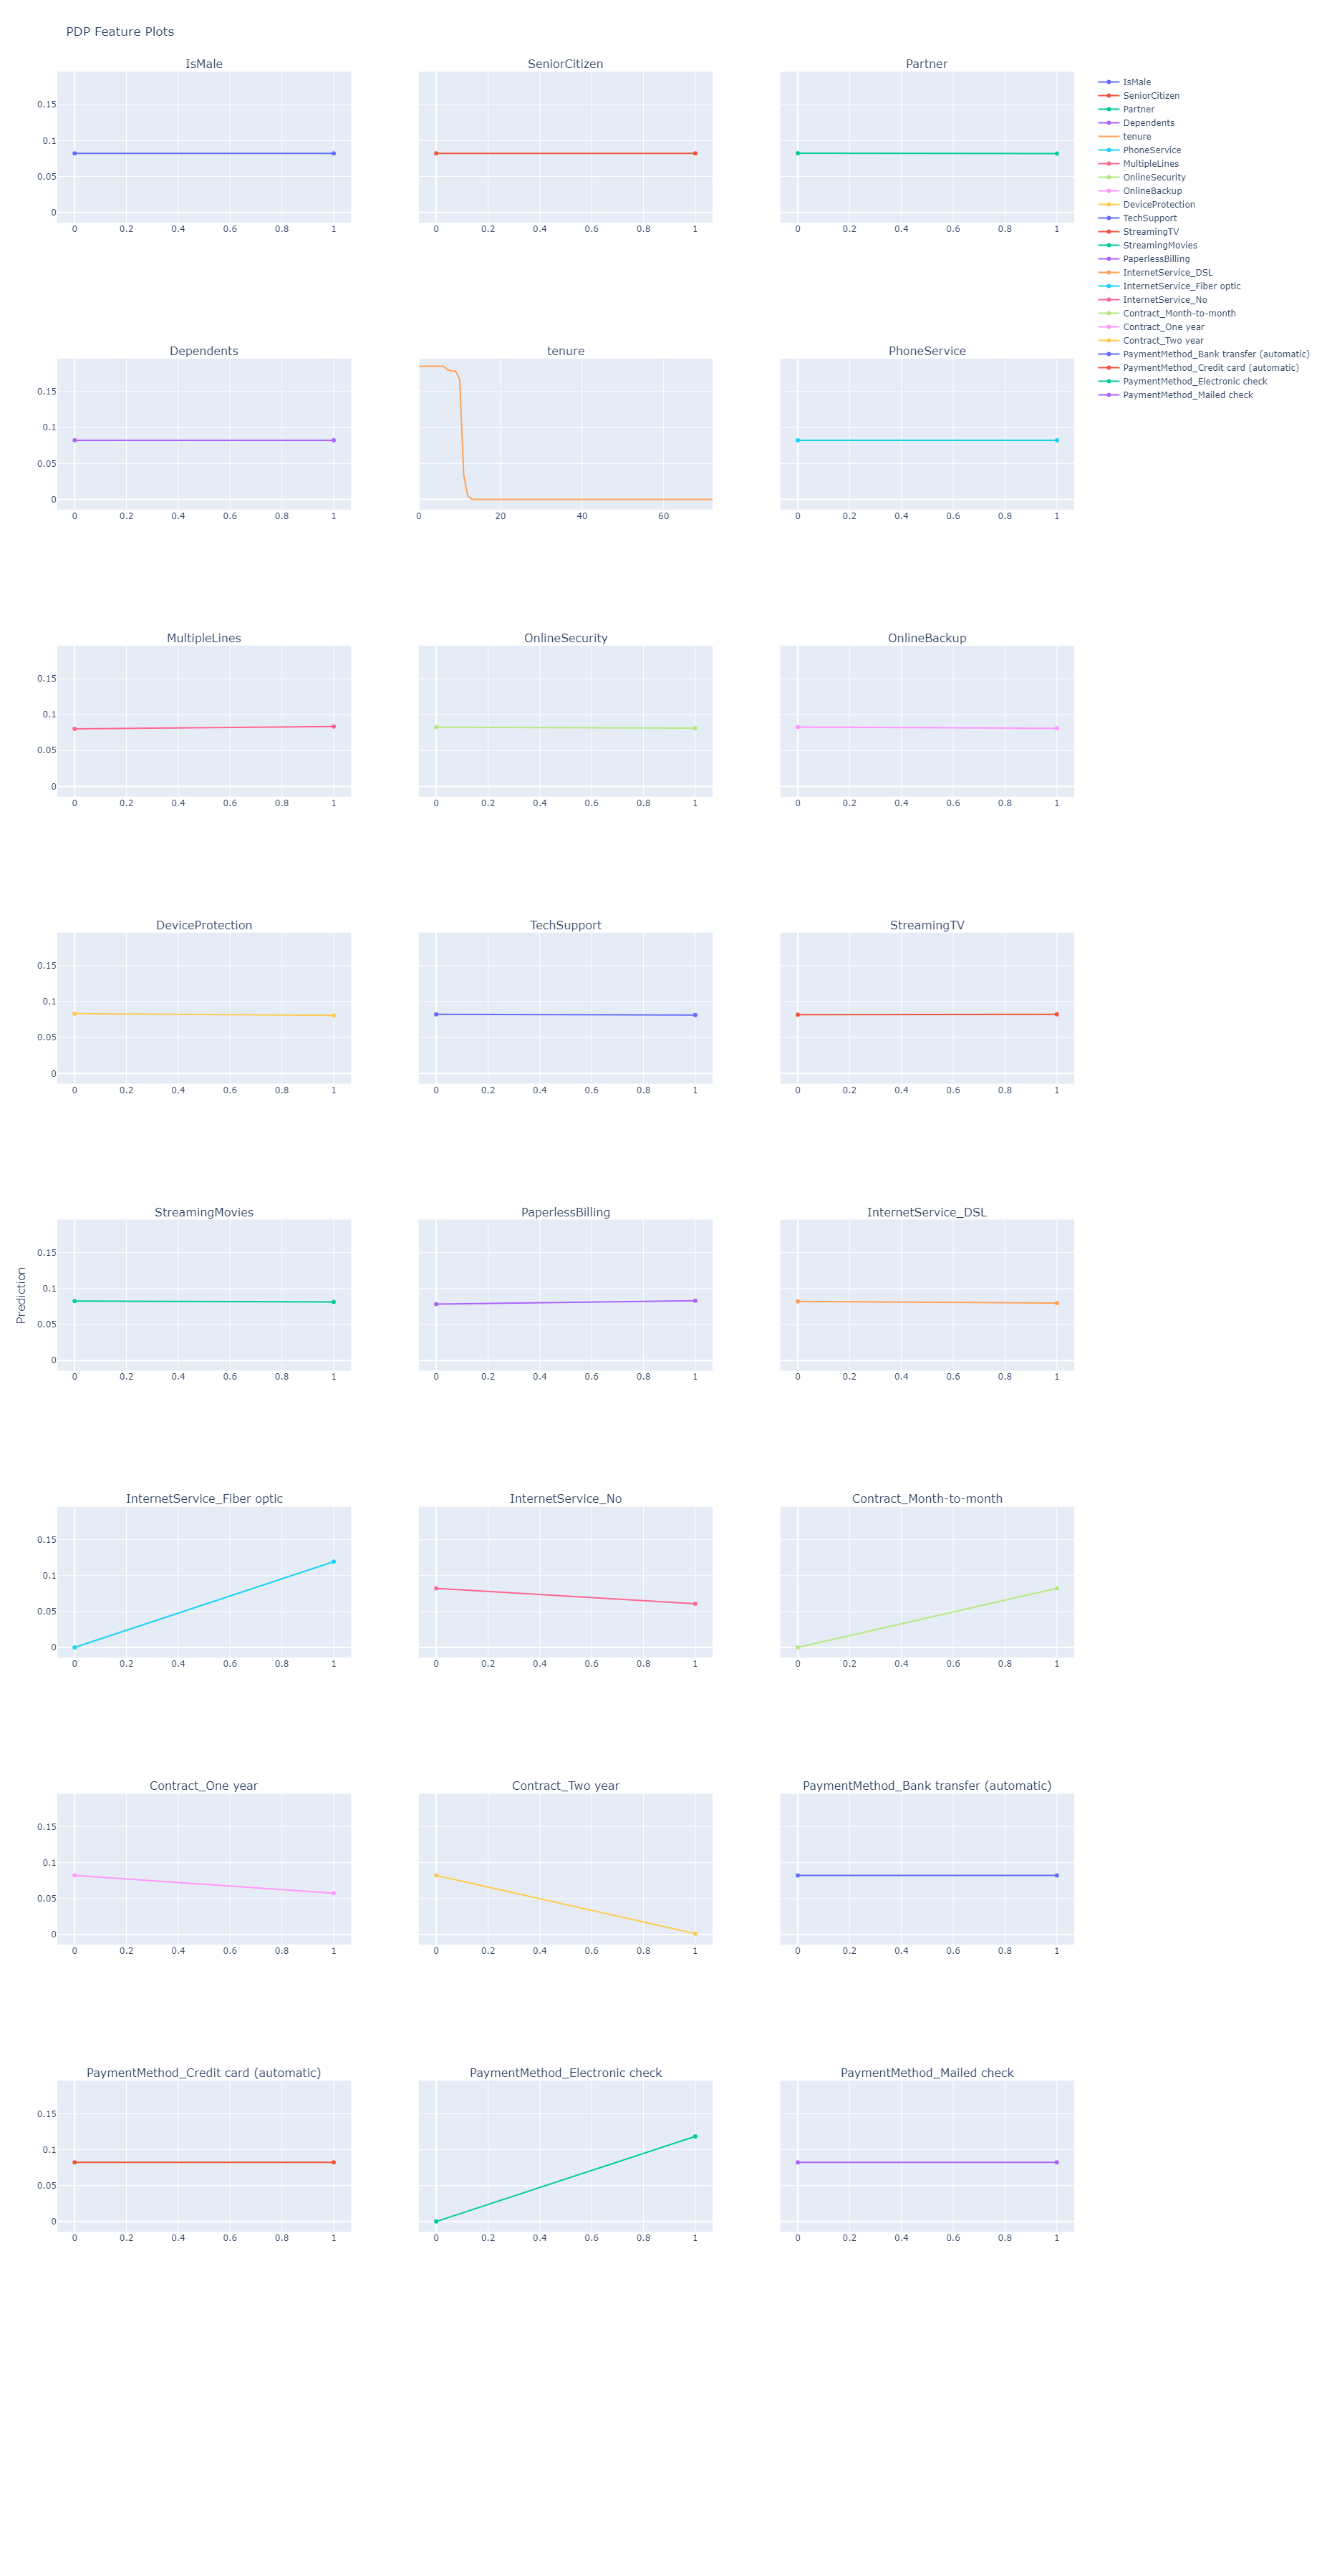

In [24]:
pdp_Graph(clf_grid.best_estimator_)

# Conclusion

### PDP
In this notebook, we created PDP subplots that conveyed an independent feature's effect on predicitions.<br> 
The prediction averages were obtained from running predictions on incrementing feature values. 

Using the averages, we can graph the trend and volatility resulting per value. The more drastic the change, the more evidence there is to support a correlation.

The main advantage of PDP over just consulting a model's feature_weights, is the trend visualization.<br>
PDP provides value ranges where the predictions are rising, falling, and stagnating, thus allowing further investigation and interpertation. <br>

### Telco Recommendations
For this Telco Churn Rate dataset, `tenure` was the most important factor in reducing churn rate. A method to secure the tenure for new customers is offering longer contracts (6% for 2 years). 

Improving the company's services should also be a priority as seen with `Fiber Optic Internet` subscibers churning (10%).

Billing should also be reconsidered. Customer's utilizing full digital methods `PaperlessBilling` and `Electronic Check Payment` seem to have an increased churn rate.<br>
Perhaps customers may have missed the billing statements or had difficulty performing digital transactions.

Lastly, while `MonthlyCharges` could be an intersting insight on ideal pricing ranges, it's recommended for further study due to its dependence on numerous different services provided.